## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style = "ticks")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

### Load the dataset

In [70]:
df = pd.read_csv(r'C:\Users\ayanp\Downloads\.ipynb_checkpoints\tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [61]:
## check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### 1. Make a list of categorical and numerical columns in the data.

In [62]:
cat = []
num = []

for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
    else:
        num.append(i)
print("Categorical columns are: ", cat)
print("Numerical columns are: ",num)

Categorical columns are:  ['sex', 'smoker', 'day', 'time']
Numerical columns are:  ['total_bill', 'tip', 'size']


### 2. Compute the average bill amount for each day.

In [8]:
## getting the mean of 'total_bill' for each 'day'
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [9]:
df.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [10]:
df.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [63]:
df['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

### 6. Find the busiest day in terms of the orders?

In [12]:
df.groupby('day')['size'].sum().idxmax()

'Sat'

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [13]:
df['total_bill'].skew()

1.1332130376158205

<Axes: xlabel='total_bill', ylabel='Density'>

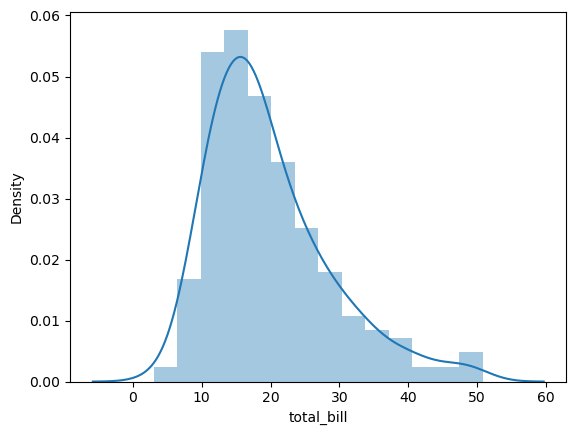

In [14]:
sns.distplot(df['total_bill'])

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

In [15]:
df[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


<Axes: xlabel='total_bill', ylabel='tip'>

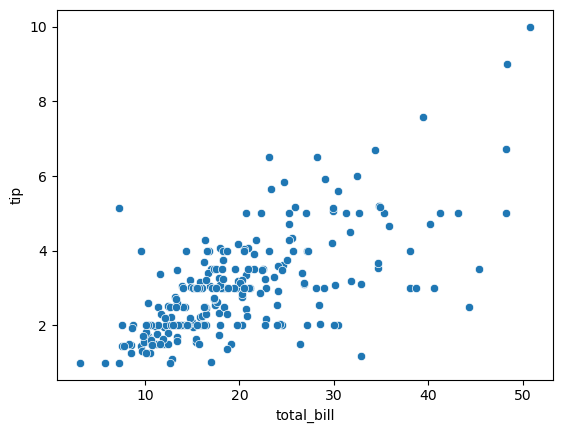

In [16]:
sns.scatterplot(x='total_bill',y='tip',data=df)

### 9. What is the percentage of males and females in the dataset? and display it in the plot

<Axes: ylabel='proportion'>

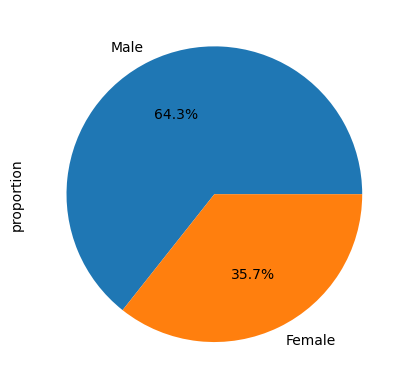

In [17]:
df['sex'].value_counts(normalize=True).plot(kind = 'pie', autopct = '%1.1f%%')

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

In [18]:
pd.crosstab(df['sex'], df['smoker'])

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


<Axes: xlabel='sex'>

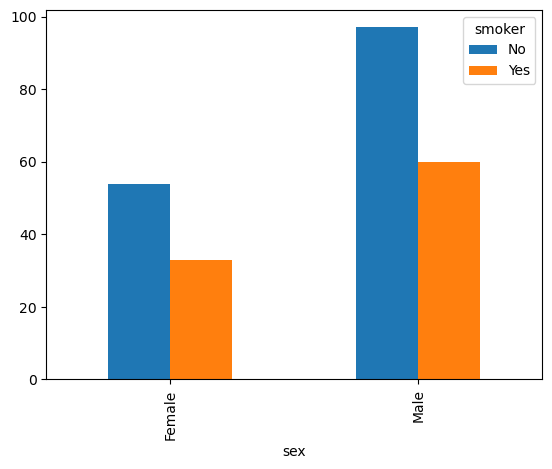

In [19]:
pd.crosstab(df['sex'], df['smoker']).plot(kind='bar')

### 11. Compute the average tip amount given for different days and display it in the plot.

In [20]:
## computing average of tip amount for each day
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

<Axes: xlabel='day', ylabel='tip'>

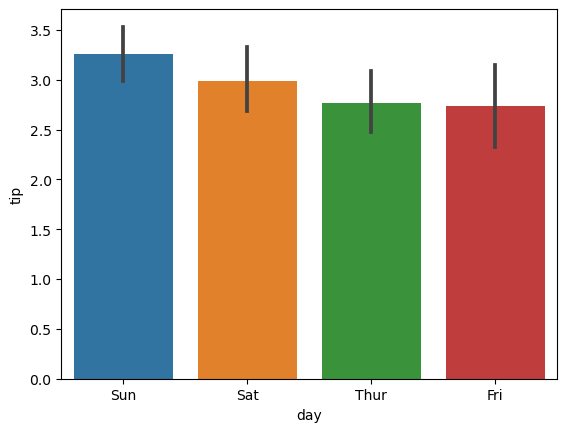

In [21]:
## plotting the average of tip amount for each day with bar-plot
sns.barplot(x='day', y='tip', data=df)

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

In [22]:
df.groupby('size')['total_bill'].mean()

size
1     7.242500
2    16.448013
3    23.277632
4    28.613514
5    30.068000
6    34.830000
Name: total_bill, dtype: float64

<Axes: xlabel='size'>

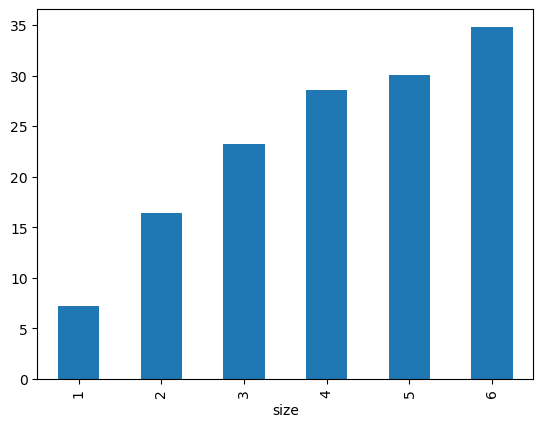

In [23]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

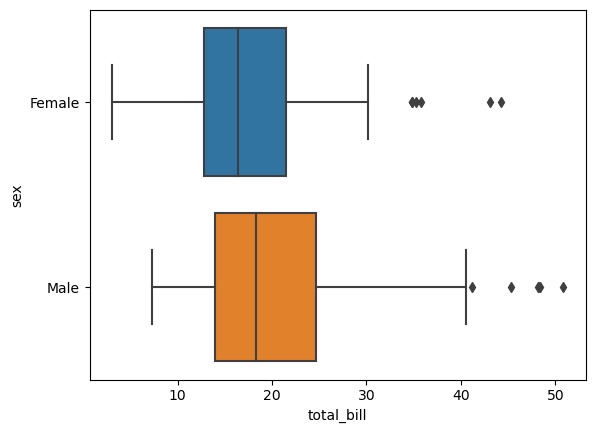

In [24]:
sns.boxplot(x = 'total_bill', y = 'sex', data = df, orient='h')
plt.show()

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [25]:
arr = ['Sat', 'Sun']
filter_df = df.loc[df['day'].isin(arr)]

## max of bill amount from filtered dataset
filter_df.groupby(['day','time'])['total_bill'].max()

day  time  
Sat  Dinner    50.81
Sun  Dinner    48.17
Name: total_bill, dtype: float64

### 15. Compute the percentage of missing values in the dataset.

In [26]:
df.isnull().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [27]:
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [28]:
len(df[df.duplicated()])

1

In [30]:
## dropping duplicates
df.drop_duplicates(inplace=True)

In [31]:
## dataset after dropping duplicates
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

<Axes: >

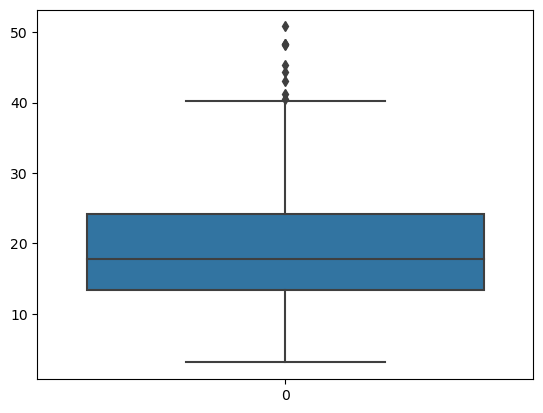

In [32]:
sns.boxplot(df['total_bill'])

In [67]:
df['total_bill_trans'] = np.log(df['total_bill'])

<Axes: >

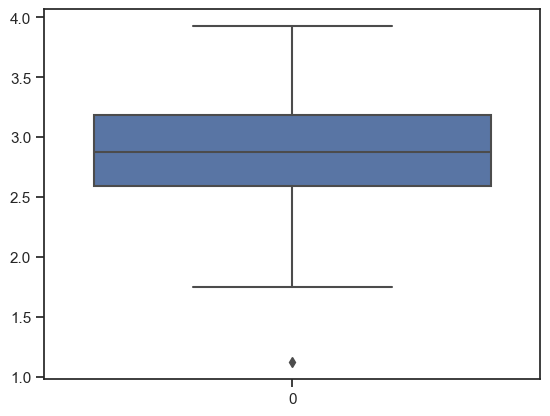

In [68]:
## boxplot after log transformation
sns.boxplot(df['total_bill_trans'])

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

<Axes: >

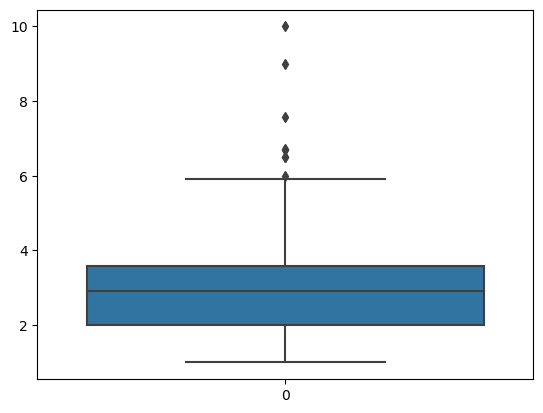

In [35]:
## Checking the outliers with the box-plot for the column 'tip' 
sns.boxplot(df['tip'])

In [36]:
## IQR treatment for outliers:

Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3-Q1

lower_whisker = Q1 - (1.5 * IQR)
upper_whisker = Q3 + (1.5 * IQR)

df_out = df.loc[(df['tip'] < upper_whisker) & (df['tip'] > lower_whisker)]

<Axes: >

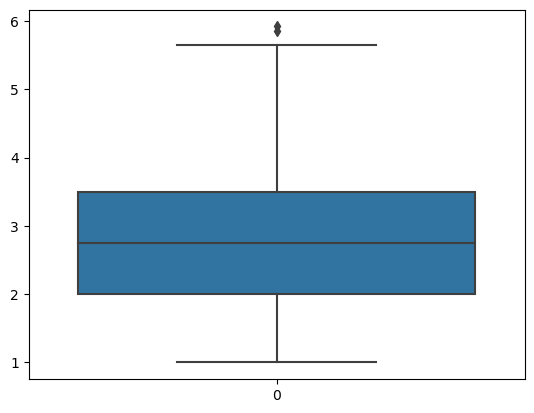

In [37]:
## plotting boxplot on the IQR treated dataset
sns.boxplot(df_out['tip'])

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [38]:
## encoding categorical columns in the dataset (with first-column type removed) and printing 5 random samples
df = pd.get_dummies(df, drop_first = True)
df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
155,29.85,5.14,5,3.396185,False,False,False,True,False,False
135,8.51,1.25,2,2.141242,False,False,False,False,True,True
232,11.61,3.39,2,2.451867,True,False,True,False,False,False
64,17.59,2.64,3,2.867331,True,False,True,False,False,False
160,21.50,3.50,4,3.068053,True,False,False,True,False,False


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [39]:
## Checking the range of the column 'total_bill'
df['total_bill'].max() - df['total_bill'].min() 

47.74

In [40]:
## initializing MinMaxScaler
mm = MinMaxScaler()

In [41]:
df['total_bill_mm'] = mm.fit_transform(df[['total_bill']])

In [42]:
df['total_bill_mm'].max() - df['total_bill_mm'].min()

0.9999999999999999

### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [66]:
tips_df = pd.read_csv(r'C:\Users\ayanp\Downloads\.ipynb_checkpoints\tips.csv')
tips_df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [44]:
tips_df = pd.get_dummies(tips_df, drop_first = True)
tips_df.head()

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,1.01,2,False,False,False,True,False,False
1,10.34,1.66,3,True,False,False,True,False,False
2,21.01,3.50,3,True,False,False,True,False,False
3,23.68,3.31,2,True,False,False,True,False,False
4,24.59,3.61,4,False,False,False,True,False,False


In [45]:
X = tips_df.drop('tip', axis = 1)
y = tips_df['tip']

In [46]:
X.head()

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,2,False,False,False,True,False,False
1,10.34,3,True,False,False,True,False,False
2,21.01,3,True,False,False,True,False,False
3,23.68,2,True,False,False,True,False,False
4,24.59,4,False,False,False,True,False,False


In [48]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(170, 8) (74, 8)
(170,) (74,)


In [50]:
mm = MinMaxScaler()

X_train.iloc[:,:2] = mm.fit_transform(X_train.iloc[:,:2])
X_test.iloc[:,:2] = mm.fit_transform(X_test.iloc[:,:2])

In [51]:
X_train.iloc[:,:2].sample(5)

,total_bill,size
21,0.299357,0.2
5,0.414141,0.6
103,0.348255,0.2
69,0.178145,0.2
238,0.656107,0.4


### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [52]:

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
## computing predictions on the test data
pred = lr.predict(X_test)

In [54]:
## Computing r2_score and printing
print('R square value', r2_score(y_test, pred))

R square value 0.2673913698106559


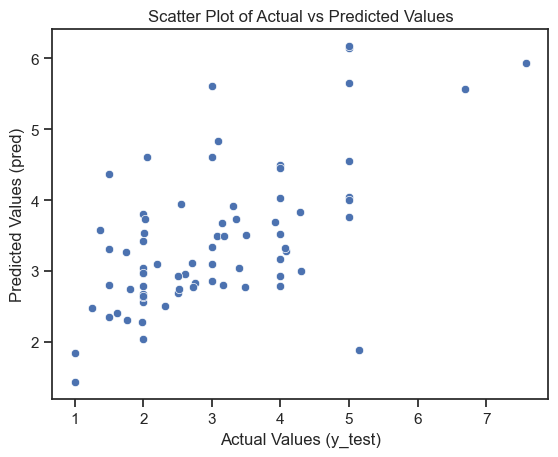

In [69]:
## plotting a scatter plot to view the distribution between test-data and predictions
sns.scatterplot(x=y_test, y=pred)
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (pred)')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.show()

### Happy Learning:)